In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [88]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [128]:
df_test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,2,0,0,7.8292,2
1,893,3,0,4,1,0,7.0000,0
2,894,2,1,2,0,0,9.6875,2
3,895,3,1,4,0,0,8.6625,0
4,896,3,0,4,1,1,12.2875,0


In [130]:
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
698,0,1,1,5,1,1,110.8833,1.0
472,1,2,0,4,1,2,27.7500,0.0
876,0,3,1,1,0,0,9.8458,0.0
363,0,3,1,4,0,0,7.0500,0.0
823,1,3,0,2,0,1,12.4750,0.0


**1) Interpretando el DataFrame**

In [91]:
print (f'Tamaño de la muestra de entrenamiento {df_train.shape}.')
print (f'Tamaño de la muestra de prueba {df_test.shape}.')

Tamaño de la muestra de entrenamiento (891, 12).
Tamaño de la muestra de prueba (418, 11).


In [92]:
print (df_train.info())
print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [93]:
print("Datos faltantes")
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

Datos faltantes
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [94]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [95]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**2) Preprocesamiento de datos**

In [96]:
df_train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [97]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [98]:
df_train["Sex"].replace(["female","male"],[0,1],inplace=True)
df_test["Sex"].replace(["female","male"],[0,1],inplace=True)
df_train["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)
df_test["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)

*Llenando las celdas N/A de la columna de Edad*

No es necesario aplicar un dropna a la columna de Edad, porque mean no toma en cuenta los valores nulos en su calculo. Es decir, es lo mismo aplicar el dropna con el mean, que solo aplicar el mean. Lo comento porqué he visto algunos códigos con dropna().mean(), no es algo que esté mal, pero hace que el código sea un poquito más lento.

In [99]:
mean_age_train=round(df_train["Age"].mean())
mean_age_test=round(df_test["Age"].mean())

mean_age_train

30

In [100]:
df_train["Age"]=df_train["Age"].replace(np.nan,mean_age_train)
df_test["Age"]=df_train["Age"].replace(np.nan,mean_age_test)

*Asignando bandas en la columna de edad
0-20, 21-28, 29-30, 31-38, 39-100*

In [101]:
quantile=np.quantile(df_train["Age"],[0.2,0.4,0.6,0.8])
quantile

array([20., 28., 30., 38.])

In [102]:
bins=[0,20,28,30,38,100]
names=[1,2,3,4,5]
df_train["Age"]=pd.cut(df_train["Age"], bins, labels=names)
df_test["Age"]=pd.cut(df_test["Age"], bins, labels=names)

*Eliminamos las columnas no necesarias, y las filas con valores nulos*

In [103]:
df_train.drop(["Cabin"],axis=1, inplace=True)
df_test.drop(["Cabin"],axis=1, inplace=True)

In [104]:
df_train=df_train.drop(["PassengerId","Name","Ticket"], axis=1)
df_test=df_test.drop(["Name","Ticket"], axis=1)

In [105]:
df_train.dropna(axis=0,how="any",inplace=True)
df_test.dropna(axis=0,how="any",inplace=True)

*Revisión de los valores nulos y dataframes*

In [106]:
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())
print(df_train.shape)
print(df_test.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 8)
(417, 8)


In [107]:
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
291,1,1,0,1,1,0,91.0792,1.0
209,1,1,1,5,0,0,31.0000,1.0
674,0,2,1,3,0,0,0.0000,0.0
534,0,3,0,3,0,0,8.6625,0.0
108,0,3,1,4,0,0,7.8958,0.0


In [108]:
df_test.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
199,1091,3,0,2,0,0,8.1125,0
231,1123,1,0,3,0,0,26.5500,0
373,1265,2,1,2,0,0,13.0000,0
79,971,3,0,3,0,0,7.7500,2
10,902,3,1,1,0,0,7.8958,0


**3) Algoritmos de Machine Learning**

In [109]:
X=np.array(df_train.drop(["Survived"],1))
y=np.array(df_train["Survived"])

<ipython-input-109-a8e6a0cbf28f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=np.array(df_train.drop(["Survived"],1))


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Regresión Logistica*

In [111]:
logred=LogisticRegression()
logred.fit(X_train, y_train)
Y_pred=logred.predict(X_test)
print("Precisión de la Regresión Logistica")
print(logred.score(X_train, y_train))

Precisión de la Regresión Logistica
0.8016877637130801


c:\users\alego\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Maquinas de Soporte*

In [112]:
svc=SVC()
svc.fit(X_train, y_train)
Y_pred=svc.predict(X_test)
print("Precisión Vectores de Soporte")
print(svc.score(X_train, y_train))

Precisión Vectores de Soporte
0.6736990154711674


*K Neighbor*

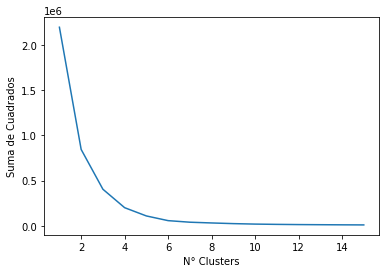

In [113]:
cr=[]
for a in range (1,16):
  kmeans= KMeans(n_clusters=a,max_iter=200)
  kmeans.fit(df_train)
  cr.append(kmeans.inertia_)

plt.plot(range(1,16),cr)
plt.xlabel("N° Clusters")
plt.ylabel("Suma de Cuadrados")
plt.show()

In [114]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
Y_pred = knn_3.predict(X_test)
print("Precisión Vecino más cercano 3")
print(knn_3.score(X_train, y_train))

Precisión Vecino más cercano 3
0.8579465541490858


In [115]:
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)
Y_pred = knn_4.predict(X_test)
print("Precisión Vecino más cercano 4")
print(knn_4.score(X_train, y_train))

Precisión Vecino más cercano 4
0.829817158931083


**4) Predicción de los modelos**

In [116]:
ids=df_test["PassengerId"]

In [117]:
prediccion_logred = logred.predict(df_test.drop('PassengerId', axis=1))
out_logred = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logred })
print('Predicción Regresión Logística:')
print(f"{out_logred.Survived.sum()} sobrevivientes")
out_logred.head()

Predicción Regresión Logística:
168 sobrevivientes


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [118]:
prediccion_svc = svc.predict(df_test.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(f"{out_svc.Survived.sum()} sobrevivientes")
out_svc.head()

Predicción Soporte de Vectores:
72 sobrevivientes


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [119]:
prediccion_knn = knn_3.predict(df_test.drop('PassengerId', axis=1))
out_knn_3 = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_knn })
print('Predicción Vecinos más cercanos:')
print(f"{out_knn_3.Survived.sum()} sobrevivientes")
out_knn_3.head()

Predicción Vecinos más cercanos:
162 sobrevivientes


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [121]:
out_knn_3.to_csv('titanic_prediccion_knn.csv', index=False)

In [159]:
prediccion=pd.read_csv("titanic_prediccion_knn.csv")
test=pd.read_csv("gender_submission.csv")
test=test.rename(columns={"Survived":"Survived_test"})
df_pres=pd.merge(prediccion,test)
df_pres["Dif"]=abs(df_pres["Survived"]-df_pres["Survived_test"])
precision_knn=df_pres["Dif"].sum()/len(df_pres)
precision_knn

0.24162679425837322